# Import library Pandas

In [3]:
import pandas as pd

# นำเข้าข้อมูล
* 1.จากคอมพิวเตอร์

In [4]:
df = pd.read_excel('Fire_Data.xlsx')

  *  2.จาก github

In [ ]:
# df = pd.read_excel('https://github.com/toab1111/geo_spa_sci_data/blob/master/Fire_Data.xlsx?raw=true') 

# แสดงผลข้อมูล
* จำนวน 5 แถว

In [5]:
df.head()

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0


ดูชนิดข้อมูลในแต่ละแถว

In [6]:
df.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
dtype: object

# สร้างข้อมูล ปีเดือนวัน
* แยกข้อมูล ในแถว ACQ_DATE เป็น ปีเดือนวันด้วย - และเก็บใน datenew

In [7]:
datenew  = df['ACQ_DATE'].dt.strftime('%Y-%m-%d').apply(str).str.split("-",expand=True)
datenew.head()

,0,1,2
0,2019,12,01
1,2019,12,01
2,2019,12,01
3,2019,12,01
4,2019,12,01


* เพิ่มแถว year,monthและday ใน df ด้วยข้อมูล datenew

In [8]:
df['year']= datenew[0]
df['month']= datenew[1]
df['day']= datenew[2]
df.head()

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,year,month,day
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0,2019,12,01
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0,2019,12,01
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0,2019,12,01
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0,2019,12,01
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0,2019,12,01


# สร้างข้อมูล ชั่วโมง และ นาที

* แยกชั่วโมงและนาทีโดยหาร100 ในแถว ACQ_TIME
  เพื่อแยกให้สองตัวสุดท้ายเป็นนาที 600 --> 6.00 หรือ 630 --> 6.30
* จากนั้นแปลงเป็น string
* แล้วแยกนาทีกับชั่วโมงด้วย . 
* เก็บข้อมูลใน timenew

In [9]:
timenew = (df['ACQ_TIME']/100).apply(str).str.split(".",expand=True)
timenew.head()

,0,1
0,6,35
1,6,35
2,6,35
3,6,35
4,6,35


* เพิ่มแถว hour และ minute ใน df ด้วยข้อมูล timenew

In [10]:
df['hour']= timenew[0]
df['minute']= timenew[1]
df.head()

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,year,month,day,hour,minute
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0,2019,12,01,6,35
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0,2019,12,01,6,35
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0,2019,12,01,6,35
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0,2019,12,01,6,35
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0,2019,12,01,6,35


# นำข้อมูล year month day hour และ minute มารวมกัน

* นำทุกแถวมาบวกกันโดยจะเติมแถว hour ให้ข้อมูลเป็นสองตัวด้วย0นำหน้า เช่น 6-->06 , 10-->10
* เก็บในแถวใหม่ new_datetime

In [11]:
df['new_datetime'] = df['year']+df['month']+df['day']+df['hour'].apply(lambda x :'{0:0>2}'.format(x))+df['minute']
df.head()

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,...,VERSION,BRIGHT_TI5,FRP,TYPE,year,month,day,hour,minute,new_datetime
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,...,1,303.4,5.8,0,2019,12,01,6,35,201912010635
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,...,1,306.3,6.4,0,2019,12,01,6,35,201912010635
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,...,1,305.0,3.8,0,2019,12,01,6,35,201912010635
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,...,1,306.0,4.6,0,2019,12,01,6,35,201912010635
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,...,1,303.9,3.1,0,2019,12,01,6,35,201912010635


* แปลงชนิดของ new_datetime ให้เป็น datetime64 
* เก็บในแถวใหม่ finish_datetime

In [12]:
df['finish_datetime'] = pd.to_datetime(df['new_datetime'], format = '%Y%m%d%H%M')
df.head()

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,...,BRIGHT_TI5,FRP,TYPE,year,month,day,hour,minute,new_datetime,finish_datetime
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,...,303.4,5.8,0,2019,12,01,6,35,201912010635,2019-12-01 06:35:00
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,...,306.3,6.4,0,2019,12,01,6,35,201912010635,2019-12-01 06:35:00
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,...,305.0,3.8,0,2019,12,01,6,35,201912010635,2019-12-01 06:35:00
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,...,306.0,4.6,0,2019,12,01,6,35,201912010635,2019-12-01 06:35:00
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,...,303.9,3.1,0,2019,12,01,6,35,201912010635,2019-12-01 06:35:00


In [13]:
df.dtypes

OBJECTID                    int64
LATITUDE                  float64
LONGITUDE                 float64
BRIGHT_TI4                float64
SCAN                      float64
TRACK                     float64
ACQ_DATE           datetime64[ns]
ACQ_TIME                    int64
SATELLITE                  object
INSTRUMENT                 object
CONFIDENCE                 object
VERSION                     int64
BRIGHT_TI5                float64
FRP                       float64
TYPE                        int64
year                       object
month                      object
day                        object
hour                       object
minute                     object
new_datetime               object
finish_datetime    datetime64[ns]
dtype: object

# แปลงข้อมูล datetime เป็น second

* แปลง finish_datetime ด้วย total_seconds เป็น วินาที
* ลบค่าทุกแถวด้วยแถวแรก
* เก็บในแถวใหม่ second_time

In [60]:
df['second_time'] = pd.to_timedelta(df.finish_datetime).dt.total_seconds().astype(int)-pd.to_timedelta(df.finish_datetime).dt.total_seconds().astype(int)[0]
df

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,...,FRP,TYPE,year,month,day,hour,minute,new_datetime,finish_datetime,second_time
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,...,5.8,0,2019,12,01,6,35,201912010635,2019-12-01 06:35:00,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,...,6.4,0,2019,12,01,6,35,201912010635,2019-12-01 06:35:00,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,...,3.8,0,2019,12,01,6,35,201912010635,2019-12-01 06:35:00,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,...,4.6,0,2019,12,01,6,35,201912010635,2019-12-01 06:35:00,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,...,3.1,0,2019,12,01,6,35,201912010635,2019-12-01 06:35:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,...,7.2,0,2020,04,04,20,03,202004042003,2020-04-04 20:03:00,10848480
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,...,2.9,0,2020,04,04,20,03,202004042003,2020-04-04 20:03:00,10848480
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,...,2.2,0,2020,04,04,20,03,202004042003,2020-04-04 20:03:00,10848480
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,...,2.9,0,2020,04,04,20,03,202004042003,2020-04-04 20:03:00,10848480


# เลือกข้อมูล 5 วันแรก

In [61]:
df5 = df['ACQ_DATE'].unique()[0:5]
df5

array(['2019-12-01T00:00:00.000000000', '2019-12-02T00:00:00.000000000',
       '2019-12-03T00:00:00.000000000', '2019-12-04T00:00:00.000000000',
       '2019-12-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [63]:
df = df.loc[(df['ACQ_DATE'] == df5[0])| (df['ACQ_DATE'] == df5[1]) | (df['ACQ_DATE'] ==  df5[2])| (df['ACQ_DATE'] == df5[3])| (df['ACQ_DATE'] ==  df5[4])]
df

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,...,FRP,TYPE,year,month,day,hour,minute,new_datetime,finish_datetime,second_time
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,...,5.8,0,2019,12,01,6,35,201912010635,2019-12-01 06:35:00,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,...,6.4,0,2019,12,01,6,35,201912010635,2019-12-01 06:35:00,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,...,3.8,0,2019,12,01,6,35,201912010635,2019-12-01 06:35:00,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,...,4.6,0,2019,12,01,6,35,201912010635,2019-12-01 06:35:00,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,...,3.1,0,2019,12,01,6,35,201912010635,2019-12-01 06:35:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,18.52934,98.95547,329.5,0.44,0.46,2019-12-05,701,N,VIIRS,...,2.9,0,2019,12,05,7,01,201912050701,2019-12-05 07:01:00,347160
396,397,19.67583,100.26594,335.0,0.55,0.51,2019-12-05,701,N,VIIRS,...,5.4,0,2019,12,05,7,01,201912050701,2019-12-05 07:01:00,347160
397,398,19.52020,100.11665,299.9,0.32,0.55,2019-12-05,1931,N,VIIRS,...,0.3,0,2019,12,05,19,31,201912051931,2019-12-05 19:31:00,392160
398,399,19.51522,100.11551,322.8,0.32,0.55,2019-12-05,1931,N,VIIRS,...,1.1,0,2019,12,05,19,31,201912051931,2019-12-05 19:31:00,392160


# Import library matplotlib
* พล็อตกราฟ 3D 
* แกน x เป็ํน LATITUDE
* แกน Y เป็ํน LONGITUDE
* แกน Z เป็ํน day โดยใช้ second_time หาร 86400

In [72]:
import matplotlib.pyplot as plt
import numpy as np

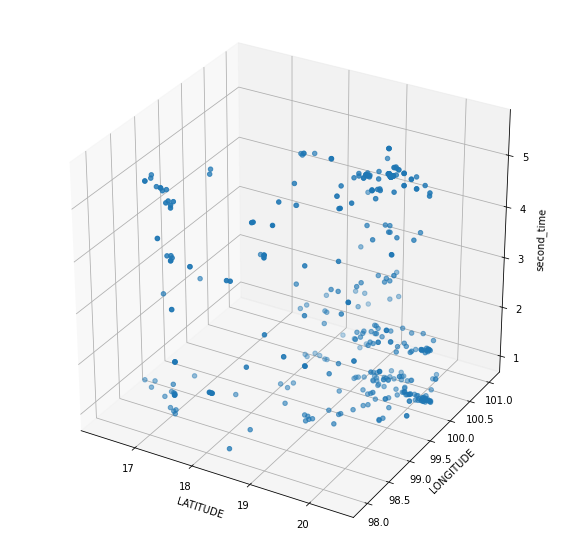

In [76]:
plot = plt.figure(figsize=(10, 10)).gca(projection='3d')
plot.scatter(df.LATITUDE, df.LONGITUDE, (df.second_time/86400)+1)
plot.set_xlabel('LATITUDE')
plot.set_ylabel('LONGITUDE')
plot.set_zlabel('day')
plt.show()